# QQOTD

### Initiating DF & Scores

In [197]:
import pandas as pd

In [198]:
df = pd.DataFrame(columns = ["date", "question", "winner", "points", "guess" ,"actual","notes"])

df["date"] = pd.to_datetime(df["date"])
df["question"] = df["question"].astype(str)
df["winner"] = df["winner"].astype(str)
df["points"] = df["points"].astype(float)
df["notes"] = df["notes"].astype(str)
df["actual"] = df["actual"].astype(str)
df["guess"] = df["notes"].astype(str)

scores = {"cal": 0, "cole": 0, "finn": 0, "wes": 0}

### Initiating Functions

In [199]:
# Adding score
def add(date, question, winner, points, guess="", actual="", notes=""):
    global df, scores

    df.loc[len(df)] = {
        "date": pd.to_datetime(date, dayfirst=True),
        "question": question,
        "winner": winner,
        "points": points,
        "guess": guess,
        "actual": actual,
        "notes": notes
    }

    scores[winner] += points

# Deducting score
def deduct(date, winner, points, guess="", actual="", notes=""):
    global df, scores

    df.loc[len(df)] = {
        "date": pd.to_datetime(date, dayfirst=True),
        "question": "deduction",
        "winner": winner,
        "points": -abs(points),
        "guess": guess,
        "actual": actual,
        "notes": notes
    }

    scores[winner] -= abs(points)


# Delete last entry
def delete_last_entry():
    global df, scores

    if len(df) == 0:
        print("No entries to delete.")
        return

    # Get the last row in the dataframe
    last_row = df.iloc[-1]

    w = last_row["winner"]       # player name (string)
    p = last_row["points"]       # this is a numpy float64

    # Reverse the score change
    # If p was positive, subtract p
    # If p was negative (deduction), subtracting p adds it back
    scores[w] = float(scores[w] - p)

    # Remove the last row
    df.drop(df.index[-1], inplace=True)

    # Reset index to keep df clean
    df.reset_index(drop=True, inplace=True)

    print(f"Deleted last entry. Reversed {p} points for {w}.")


In [225]:
add("15-11-2025", "titin questions", "cal", 3, "100k, 2 hours, 20k", "~189k, ~3 hours, ~30k")

In [226]:
scores

{'cal': 35.5, 'cole': 44.0, 'finn': 49.0, 'wes': 41.6}

In [227]:
df

,date,question,winner,points,guess,actual,notes
0,2025-11-09,init,wes,40.6,,,
1,2025-11-09,init,cal,32.5,,,
2,2025-11-09,init,cole,44.0,,,
3,2025-11-09,init,finn,49.0,,,
4,2025-11-14,avg. phone touches per day,wes,1.0,"1,500",,
5,2025-11-15,titin questions,cal,3.0,"100k, 2 hours, 20k","~189k, ~3 hours, ~30k",


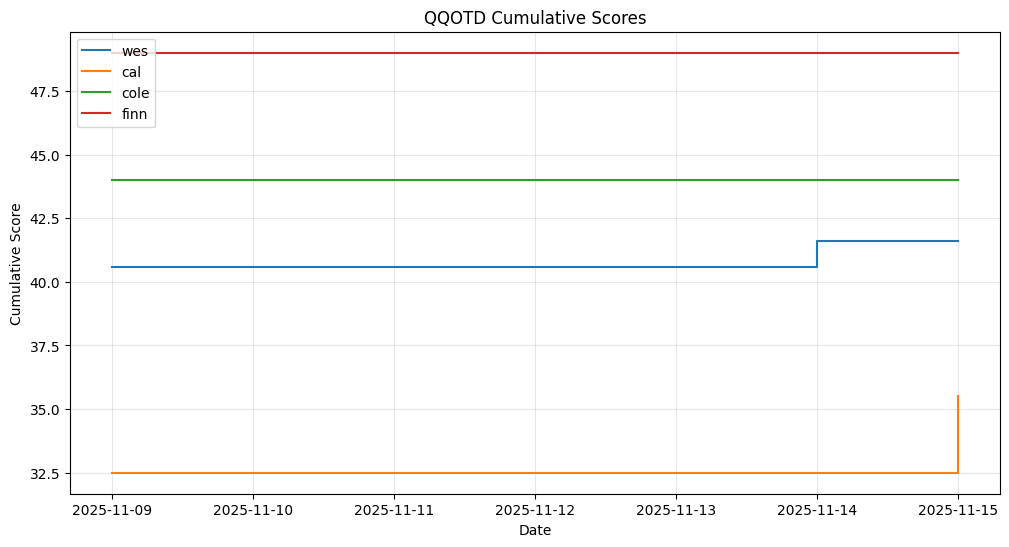

In [232]:
import matplotlib.pyplot as plt
import pandas as pd

df_sorted = df.sort_values("date")
df_sorted["cumulative"] = df_sorted.groupby("winner")["points"].cumsum()

all_dates = pd.date_range(df_sorted["date"].min(), df_sorted["date"].max())

plt.figure(figsize=(12,6))

for name in df_sorted["winner"].unique():
    person = df_sorted[df_sorted["winner"] == name].set_index("date")[["cumulative"]]
    
    person = person.reindex(all_dates)
    
    person["cumulative"] = person["cumulative"].ffill().fillna(0)
    
    plt.step(
        person.index,
        person["cumulative"],
        where="post",
        label=name
    )

plt.legend()
plt.xlabel("Date")
plt.ylabel("Cumulative Score")
plt.title("QQOTD Cumulative Scores")
plt.grid(True, alpha=0.3)
plt.show()
